In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kagglehub

In [2]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/Ayush8757/PlantDiseasesDetection/refs/heads/main/helper_function.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

--2025-03-14 12:57:42--  https://raw.githubusercontent.com/Ayush8757/PlantDiseasesDetection/refs/heads/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4846 (4.7K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   4.73K  --.-KB/s    in 0s      

2025-03-14 12:57:43 (52.2 MB/s) - ‘helper_function.py’ saved [4846/4846]



In [3]:
import helper_function

In [4]:
import tensorflow_datasets as tfds
# Get all available datasets in TFDS
datasets_list = tfds.list_builders()

# Set our target dataset and see if it exists
target_dataset = "plant_village"
print(f"'{target_dataset}' in TensorFlow Datasets: {target_dataset in datasets_list}")

'plant_village' in TensorFlow Datasets: True


In [5]:
import tensorflow_datasets as tfds

# Load the entire dataset as "train"
train_data, ds_info = tfds.load(
    name="plant_village",
    split="train",  # Load the entire dataset as "train"
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Manually split the data into training and testing sets
num_samples = ds_info.splits['train'].num_examples
num_test_samples = int(0.2 * num_samples)  # Use 15% for testing
num_train_samples = num_samples - num_test_samples

test_data = train_data.take(num_test_samples)
train_data = train_data.skip(num_test_samples)

# Now you have train_data and test_data variables
print(f"Training data size: {num_train_samples}")
print(f"Testing data size: {num_test_samples}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/54303 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.1P5XXS_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.
Training data size: 43443
Testing data size: 10860


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=38),
})

In [9]:
class_names = ds_info.features["label"].names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomat

In [10]:
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from PlantVillage (tensor form): {label}
  Class name (str form): {class_names[label.numpy()] if 0 <= label.numpy() < len(class_names) else 'Unknown Class'}
        """) # Check if label.numpy() is within the valid range of class_names indices


  Image shape: (256, 256, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from PlantVillage (tensor form): 31
  Class name (str form): Tomato___Late_blight
        


In [12]:
image

<tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
array([[[132, 127, 131],
        [128, 123, 127],
        [123, 118, 122],
        ...,
        [136, 131, 135],
        [137, 132, 136],
        [137, 132, 136]],

       [[127, 122, 126],
        [126, 121, 125],
        [125, 120, 124],
        ...,
        [128, 123, 127],
        [117, 112, 116],
        [106, 101, 105]],

       [[122, 117, 121],
        [124, 119, 123],
        [126, 121, 125],
        ...,
        [126, 121, 125],
        [120, 115, 119],
        [108, 103, 107]],

       ...,

       [[128, 124, 121],
        [132, 128, 125],
        [132, 128, 125],
        ...,
        [ 87,  83,  84],
        [ 83,  79,  80],
        [ 79,  75,  76]],

       [[125, 121, 118],
        [130, 126, 123],
        [131, 127, 124],
        ...,
        [ 76,  72,  73],
        [ 75,  71,  72],
        [ 74,  70,  71]],

       [[120, 116, 113],
        [126, 122, 119],
        [128, 124, 121],
        ...,
        [ 76,  72,  7

In [13]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=27>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=224>)

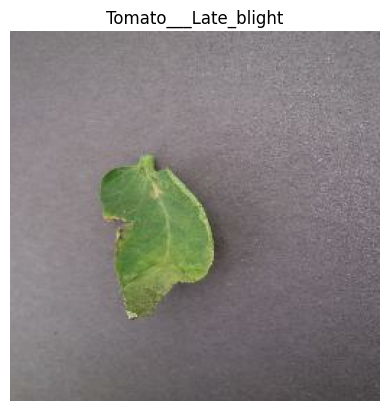

In [14]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

In [15]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [16]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[132 127 131]
  [128 123 127]
  [123 118 122]
  ...
  [136 131 135]
  [137 132 136]
  [137 132 136]]

 [[127 122 126]
  [126 121 125]
  [125 120 124]
  ...
  [128 123 127]
  [117 112 116]
  [106 101 105]]]...,
Shape: (256, 256, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[131.37244  126.37245  130.37244 ]
  [126.84694  121.84694  125.84694 ]
  [122.83674  117.83674  121.83674 ]
  ...
  [134.89287  129.89287  133.89287 ]
  [135.54082  130.54082  134.54082 ]
  [134.84183  129.84183  133.84183 ]]

 [[125.90306  120.90306  124.90306 ]
  [125.494896 120.494896 124.494896]
  [125.80102  120.80102  124.80102 ]
  ...
  [128.66833  123.668335 127.668335]
  [119.77034  114.77034  118.77034 ]
  [107.22939  102.22939  106.22939 ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


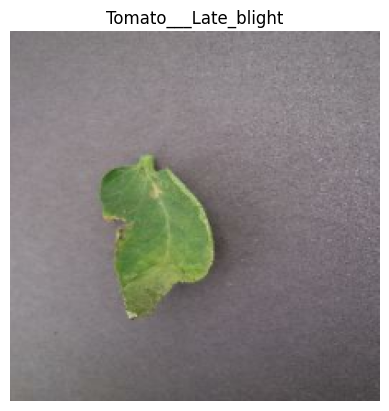

In [17]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

In [18]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [19]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [20]:
# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

In [21]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

In [24]:
# Create a function to recreate the original model outside of the fit method
from tensorflow.keras.layers import Dropout
def create_model():
    input_shape = (224, 224, 3)
    base_model = tf.keras.applications.EfficientNetV2B3(include_top=False)
    base_model.trainable = False  # freeze base model layers

    # Create Functional model
    inputs = layers.Input(shape=input_shape, name="input_layer")
    # Add in data augmentation Sequential model as a layer
    x = data_augmentation(inputs)
    x = Dropout(0.3)(x)
    x = base_model(inputs, training=False)  # set base_model to inference mode only
    x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
    x = layers.Dense(len(class_names))(x)  # want one output neuron per class
    outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Create the model before fitting
model = create_model()

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Continue with the rest of your code

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b3 (Functional)       │ (None, 7, 7, 1536)          │      12,930,622 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_layer                        │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 38)                  │          58,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_4 (Cast)                        │ (None, 38)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_float32 (Activation)         │ (None, 38)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,989,028 (49.55 MB)

 Trainable params: 58,406 (228.15 KB)

 Non-trainable params: 12,930,622 (49.33 MB)

In [26]:
from helper_function import create_tensorboard_callback

# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
# history = model.fit(train_data,
#                     epochs=5,
#                     steps_per_epoch=len(train_data),
#                     validation_data=test_data,
#                     validation_steps=int(0.25 * len(test_data)),
#                     callbacks=[create_tensorboard_callback("training_logs","EfficientNetV2B3_PlantVillage"),
#                                model_checkpoint])

In [27]:
# Evaluate model (unsaved version) on whole test dataset
# results_feature_extract_model = model.evaluate(test_data)
# results_feature_extract_model

In [28]:
# created_model = create_model()
# created_model.compile(loss="sparse_categorical_crossentropy",
#                       optimizer=tf.keras.optimizers.Adam(),
#                       metrics=["accuracy"])

# # 3. Load the saved weights
# created_model.load_weights(checkpoint_path)

# # 4. Evaluate the model with loaded weights
# results_created_model_with_loaded_weights = created_model.evaluate(test_data)

In [29]:
# assert np.isclose(results_feature_extract_model, results_created_model_with_loaded_weights).all(), "Loaded weights results are not close to original model."  # check if all elements in array are close
# results_created_model_with_loaded_weights

In [30]:
for layer in model.layers:
    layer.trainable = False

# Unfreeze only the last 10 layers
for layer in model.layers[-10:]:
    layer.trainable = True

# Print layer details to verify
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)


input_layer True float32 <DTypePolicy "mixed_float16">
efficientnetv2-b3 True float32 <DTypePolicy "mixed_float16">
pooling_layer True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [31]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/First.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [32]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [33]:
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(0.001), # 10x lower learning rate than the default
              metrics=["accuracy"])

In [34]:
# Start to fine-tune (all layers)
history01 = model.fit(train_data,
                      epochs=100, # fine-tune for a maximum of 100 epochs
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.25 * len(test_data)), # validation during training on 15% of test data
                      callbacks=[create_tensorboard_callback("training_logs", "efficientb7_PlantVillageMain"), # track the model training logs
                                 model_checkpoint, # save only the best model during training
                                 early_stopping, # stop model after X epochs of no improvements
                                 reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: training_logs/efficientb7_PlantVillageMain/20250314-130634
Epoch 1/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 450s 199ms/step - accuracy: 0.8728 - loss: 0.4617 - val_accuracy: 0.9816 - val_loss: 0.0597 - learning_rate: 0.0010
Epoch 2/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 180s 122ms/step - accuracy: 0.9724 - loss: 0.0848 - val_accuracy: 0.9857 - val_loss: 0.0500 - learning_rate: 0.0010
Epoch 3/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 261s 164ms/step - accuracy: 0.9819 - loss: 0.0569 - val_accuracy: 0.9901 - val_loss: 0.0315 - learning_rate: 0.0010
Epoch 4/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 199s 142ms/step - accuracy: 0.9850 - loss: 0.0449 - val_accuracy: 0.9886 - val_loss: 0.0424 - learning_rate: 0.0010
Epoch 5/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9885 - loss: 0.0375
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 164s 118ms/step - accuracy: 0.9885 - loss: 0.0375 - val_accuracy: 0.9890 

In [35]:
model.save("/content/drive/My Drive/EfficientNetV2B3_plant_village_model.h5")

In [36]:
model.save("/content/drive/My Drive/EfficientNetV2B3_village_model.keras")

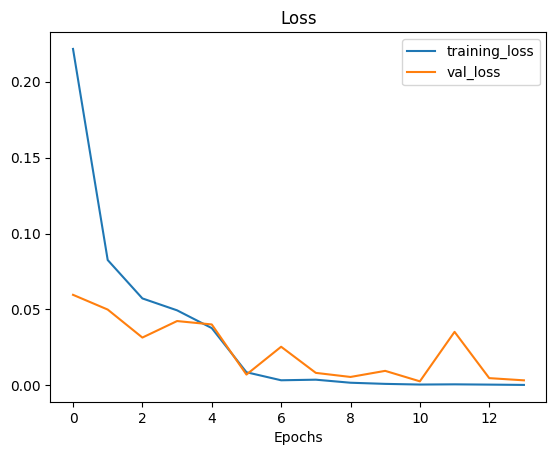

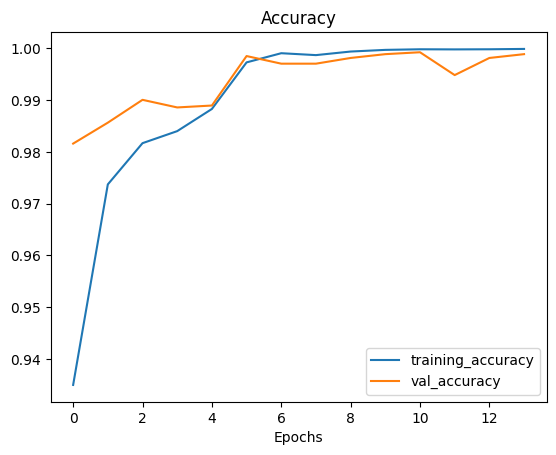

In [37]:
from helper_function import plot_loss_curves
plot_loss_curves(history01)

In [38]:
!zip -r model_checkpoint.zip /content/fine_tune_checkpoints
from google.colab import files
files.download("model_checkpoint.zip")

  adding: content/fine_tune_checkpoints/ (stored 0%)
  adding: content/fine_tune_checkpoints/First.keras (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
!zip -r training_logs.zip /content/training_logs
files.download("training_logs.zip")


  adding: content/training_logs/ (stored 0%)
  adding: content/training_logs/efficientb7_PlantVillageMain/ (stored 0%)
  adding: content/training_logs/efficientb7_PlantVillageMain/20250314-130634/ (stored 0%)
  adding: content/training_logs/efficientb7_PlantVillageMain/20250314-130634/train/ (stored 0%)
  adding: content/training_logs/efficientb7_PlantVillageMain/20250314-130634/train/events.out.tfevents.1741957594.ff4b78f976ab.614.0.v2 (deflated 97%)
  adding: content/training_logs/efficientb7_PlantVillageMain/20250314-130634/validation/ (stored 0%)
  adding: content/training_logs/efficientb7_PlantVillageMain/20250314-130634/validation/events.out.tfevents.1741958026.ff4b78f976ab.614.1.v2 (deflated 74%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
model.evaluate(test_data)

340/340 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9989 - loss: 0.0038


[0.007562802638858557, 0.9982504844665527]

In [41]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9989 - loss: 0.0038
Test Accuracy: 99.83%
